# 3.6 Lab: Linear Regression

## 3.6.1 Libraries

In [1]:
# load some libraries

# MASS comes with conda's r-essentials
library(MASS)

# ISLR isn't currently in any conda channel, so you'll have to build it and install it
# see instructions in install-instructions/README.md
library(ISLR)

## 3.6.2 Simple Linear Regression

In [2]:
# read the Boston docs
?Boston

In [3]:
# load the boston data and rename the variable
data(Boston)
boston = Boston

In [4]:
# see the names of the variables in the data
names(boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [5]:
# create a linear model regressing lstat on medv
lm_1 = lm(medv ~ lstat, data = boston)

In [6]:
# see brief fit information for the model
lm_1


Call:
lm(formula = medv ~ lstat, data = boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [7]:
# see more detailed fit information for the model
summary(lm_1)


Call:
lm(formula = medv ~ lstat, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [8]:
# see the names everything that the lm_1 object has
names(lm_1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [9]:
# get the coefficients
coef(lm_1)

(Intercept)       lstat 
 34.5538409  -0.9500494

In [10]:
# get the coefficients directly 
lm_1$coefficients

(Intercept)       lstat 
 34.5538409  -0.9500494

In [11]:
# predict medv based on some levels of lstat
predict(lm_1, data.frame(lstat=c(5, 10, 15)))

1        2        3 
29.80359 25.05335 20.30310

In [12]:
# add a confidence interval
predict(
    lm_1,
    data.frame(lstat=c(5, 10, 15)),
    interval = "confidence"
)

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [13]:
# do a prediction interval instead
predict(
    lm_1,
    data.frame(lstat=c(5, 10, 15)),
    interval = "prediction"
)

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


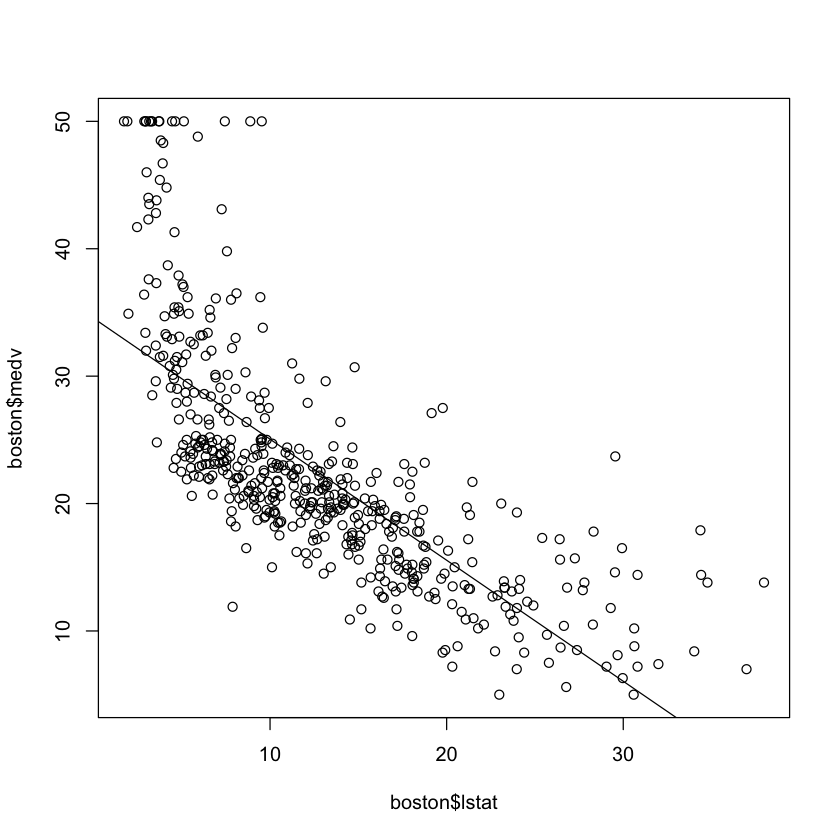

In [14]:
# quick plot of lstat on medv with fit line
plot(boston$lstat, boston$medv)
abline(lm_1)

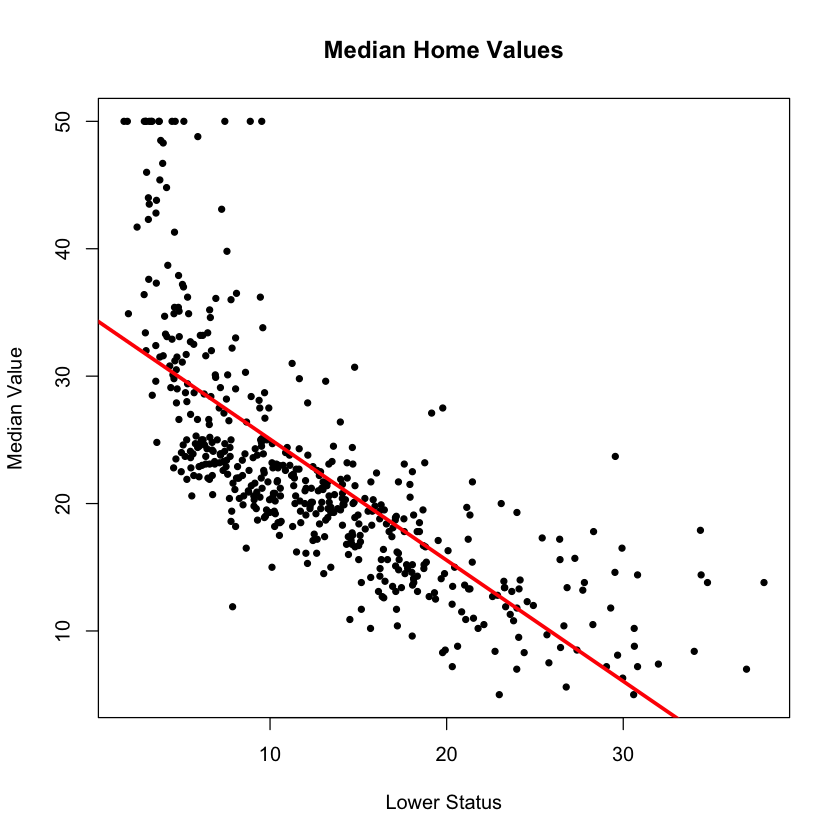

In [15]:
# clean up the plot
plot(
    boston$lstat,
    boston$medv,
    xlab = "Lower Status",
    ylab = "Median Value",
    main = "Median Home Values",
    pch = 20
)

abline(
    lm_1,
    lwd=3,
    col="red"
)

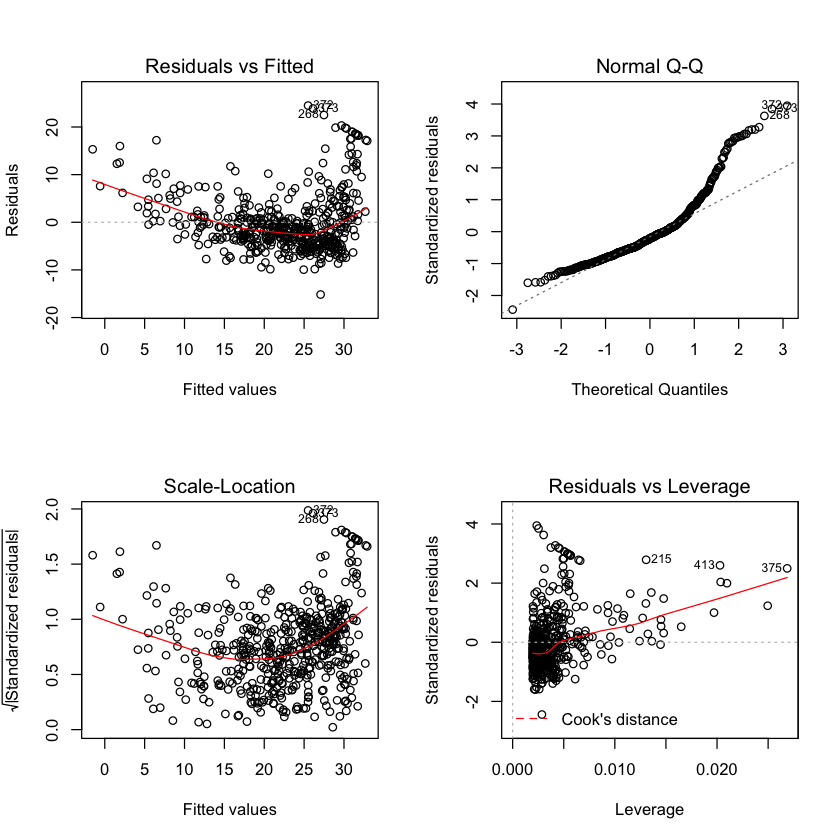

In [16]:
# diagnostic plots arranges
par(mfrow=c(2, 2))
plot(lm_1)

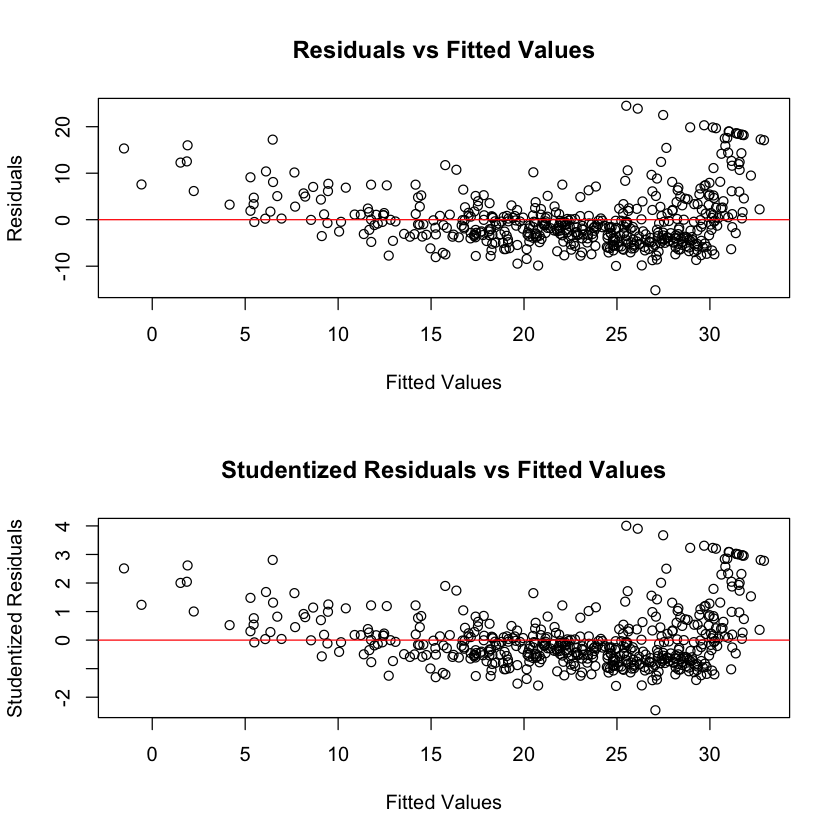

In [17]:
# plot residuals and studentized residuals manually
par(mfrow=c(2,1))

# residuals
plot(
    predict(lm_1),
    residuals(lm_1),
    xlab="Fitted Values",
    ylab="Residuals",
    main="Residuals vs Fitted Values"
)

abline(h=0, col="red")

# studentized residuals

plot(
    predict(lm_1),
    rstudent(lm_1),
    xlab="Fitted Values",
    ylab="Studentized Residuals",
    main="Studentized Residuals vs Fitted Values"
)

abline(h=0, col="red")

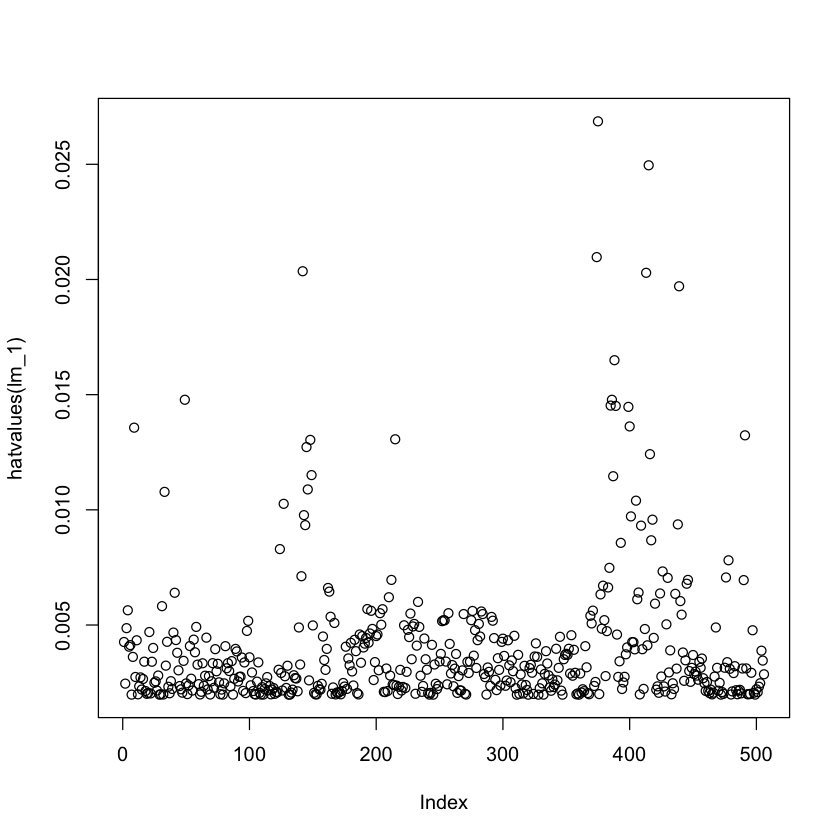

In [18]:
# plot leverage statistics for each point
plot(hatvalues(lm_1))

In [19]:
# find the maximum leverage observation
which.max(hatvalues(lm_1))

375 
375

## 3.6.3 Multiple Linear Regression

In [20]:
# regress lower status and age on median value and check the result
lm_2 = lm(medv ~ lstat + age, data=boston)
summary(lm_2)


Call:
lm(formula = medv ~ lstat + age, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [21]:
# regress all available variables on median value and check the result
lm_3 = lm(medv ~ ., data=boston)
summary(lm_3)


Call:
lm(formula = medv ~ lstat + age, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [22]:
# check for multicollinearity with the variance inflation factor (VIF) from the car package
# see instruction in the install-instructions/README.md for a package on conda
library(car)
vif(lm_3)

Loading required package: carData


crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

In [23]:
# regress all available variables except age on median value and check the result
lm_4 = lm(medv ~ . - age, data=boston)
summary(lm_4)


Call:
lm(formula = medv ~ lstat + age, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


## 3.6.4 Interaction Terms

In [26]:
# regress only the interaction of lower status and balck on median value and check the result
lm_5 = lm(medv ~ lstat : black, data=boston)
summary(lm_5)


Call:
lm(formula = medv ~ lstat:black, data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.9377  -3.4993  -0.9214   2.7866  26.0088 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.4706654  0.6669783   45.69   <2e-16 ***
lstat:black -0.0018569  0.0001332  -13.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.82 on 504 degrees of freedom
Multiple R-squared:  0.2784,	Adjusted R-squared:  0.277 
F-statistic: 194.5 on 1 and 504 DF,  p-value: < 2.2e-16


In [ ]:
# regress the interaction of lower status and balck and the non-interacted varialbes on median value
# check the result
lm_6 = lm(medv ~ lstat * black, data=boston)
summary(lm_6)